In [93]:
import os
import glob
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [5]:
all_heights = []
for dir_name in glob.glob('data/set*'):
    with open(f"{dir_name}/annotations_res.json") as json_file:
        annotations = json.load(json_file)
    dataset = dir_name.split('\\')[-1]
    for video in annotations[dataset]:
        for frame in annotations[dataset][video]['frames']:
            people = annotations[dataset][video]['frames'][frame]
            for person in people:
                all_heights.append(person['pos'][3])
    

In [6]:
len(all_heights)

285558

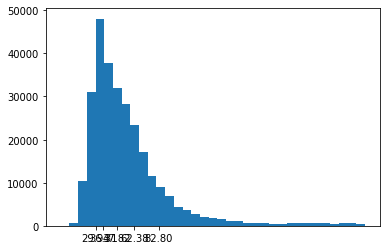

In [27]:
%matplotlib inline
fig, ax = plt.subplots()
all_heights_n = np.array(all_heights)
all_heights_p = pd.Series(all_heights_n[all_heights_n < 256])
q_1 = np.quantile(all_heights_n, 0.15)
q_2 = np.quantile(all_heights_n, 0.3)
q_3 = np.quantile(all_heights_n, 0.5)
q_4 = np.quantile(all_heights_n, 0.7)
q_5 = np.quantile(all_heights_n, 0.85)
_, bins, _ = ax.hist(all_heights_p, bins=35)
ax.set_xticks((q_1, q_2, q_3, q_4, q_5))
plt.show()

In [28]:
bins_copy = bins.copy()

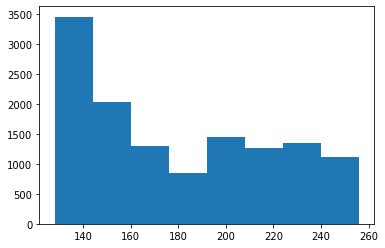

In [29]:
fig, ax = plt.subplots()
all_heights_p_256 = pd.Series(all_heights_n[np.logical_and(all_heights_n > 128, all_heights_n < 256)])
_, bins, _ = ax.hist(all_heights_p_256, bins=8)
bins_256 = bins.copy()
plt.show()

In [34]:
new_bins = np.hstack([bins_copy[bins_copy < bins_256.min()], bins_256])
new_bins

array([  0.58308259,   7.88023682,  15.17739105,  22.47454527,
        29.7716995 ,  37.06885373,  44.36600796,  51.66316218,
        58.96031641,  66.25747064,  73.55462486,  80.85177909,
        88.14893332,  95.44608755, 102.74324177, 110.040396  ,
       117.33755023, 124.63470446, 128.00943181, 144.0061879 ,
       160.00294399, 175.99970008, 191.99645618, 207.99321227,
       223.98996836, 239.98672445, 255.98348055])

In [33]:
bins_copy[bins_copy < bins_256.min()]

array([  0.58308259,   7.88023682,  15.17739105,  22.47454527,
        29.7716995 ,  37.06885373,  44.36600796,  51.66316218,
        58.96031641,  66.25747064,  73.55462486,  80.85177909,
        88.14893332,  95.44608755, 102.74324177, 110.040396  ,
       117.33755023, 124.63470446])

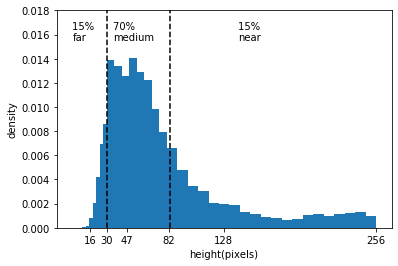

In [106]:
%matplotlib inline
fig, ax = plt.subplots()
ax.set_ylim([0, 0.018])
all_heights_n = np.array(all_heights)
all_heights_p = pd.Series(all_heights_n[all_heights_n < 256])
q_1 = math.ceil(np.quantile(all_heights_n, 0.15))
# q_2 = np.quantile(all_heights_n, 0.3)
q_3 = np.quantile(all_heights_n, 0.5)
# q_4 = np.quantile(all_heights_n, 0.7)
q_5 = np.quantile(all_heights_n, 0.85)
wght = all_heights_n[all_heights_n < 256] / all_heights_n[all_heights_n < 256].shape[0]
_, bins, _ = ax.hist(all_heights_p, bins=new_bins, density=True, weights=wght)
ax.set_xticks(tuple(map(int, [16, q_1, q_3, q_5, 128, 256])))
ax.text(35, 0.0155, "70% \nmedium")
ax.text(1, 0.0155, "15% \nfar")
ax.text(140, 0.0155, "15% \nnear")
ax.axvline(x=q_1, color='black', linestyle='--')
ax.axvline(x=q_5, color='black', linestyle='--')
ax.set_xlabel('height(pixels)')
ax.set_ylabel('density')
plt.savefig('height_ditsrib.png')

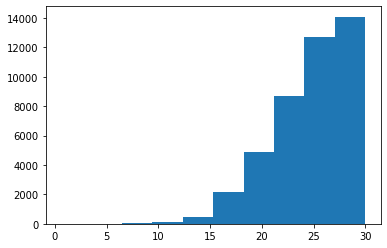

In [61]:
fig, ax = plt.subplots()
all_heights_p_256 = pd.Series(all_heights_n[all_heights_n < 30])
_, bins, _ = ax.hist(all_heights_p_256, bins=10)
small_bins = bins.copy()
plt.show()

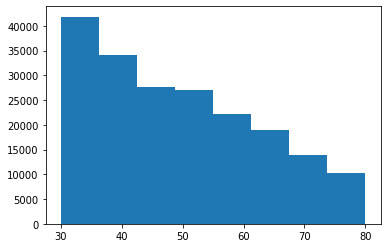

In [62]:
fig, ax = plt.subplots()
all_heights_p_256 = pd.Series(all_heights_n[np.logical_and(all_heights_n > 30, all_heights_n < 80)])
_, bins, _ = ax.hist(all_heights_p_256, bins=8)
medium_beans = bins.copy()
plt.show()


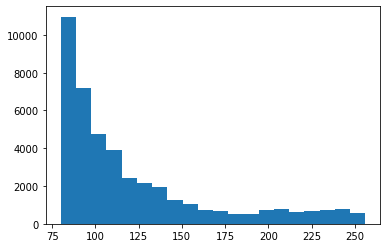

In [63]:
fig, ax = plt.subplots()
all_heights_p_256 = pd.Series(all_heights_n[np.logical_and(all_heights_n > 80, all_heights_n < 256)])
_, bins, _ = ax.hist(all_heights_p_256, bins=20)
big_bins = bins.copy()
plt.show()

In [90]:
new_bins = np.hstack([small_bins, medium_beans, big_bins])
new_bins = np.delete(new_bins, [10,19])
new_bins

array([  0.58308259,   3.52476669,   6.46645079,   9.40813489,
        12.34981899,  15.29150309,  18.23318719,  21.17487129,
        24.11655539,  27.05823949,  30.00062403,  36.25052234,
        42.50042066,  48.75031898,  55.00021729,  61.25011561,
        67.50001392,  73.74991224,  80.0009246 ,  88.8000524 ,
        97.5991802 , 106.39830799, 115.19743579, 123.99656359,
       132.79569139, 141.59481918, 150.39394698, 159.19307478,
       167.99220257, 176.79133037, 185.59045817, 194.38958597,
       203.18871376, 211.98784156, 220.78696936, 229.58609715,
       238.38522495, 247.18435275, 255.98348055])

In [107]:
all_heights_n.shape


(285558,)